# Dim reduction and clustering of scvi latent space 

In [2]:
library_load <- suppressMessages(
    
    list(
        
        # Seurat 
        library(Seurat),

        # Data 
        library(dplyr), 
        
        # Plot
        library(ggplot2), 
        library(patchwork)
        
    )
    
)

In [3]:
random_seed <- 42
set.seed(random_seed)

In [4]:
reticulate::use_python("~/bin/miniconda3/envs/r.4.1.0-FD20200109SPLENO/bin/python")

In [5]:
options(warn=-1)

In [6]:
# Set working directory to project root
setwd("/research/peer/fdeckert/FD20200109SPLENO")

In [7]:
# Source files
source("plotting_global.R")
source("bin/SeuratQC.R")
source("/research/peer/fdeckert/scFacility/script/dirFacility.R")

# Parameter settings

In [8]:
# Plotting Theme
ggplot2::theme_set(theme_global_set()) # From project global source()

# Import scvi as Seurat Object

In [ ]:
source("/research/peer/fdeckert/scFacility/script/dirFacility.R")
so <- dir2seurat(dir="data/object/seurat", assays="SCVI")

# Dimensional reduction and clustering (latent space) 

In [ ]:
# Find clusters, then run UMAP, and visualize
so <- FindNeighbors(so, dims=1:10, reduction="latent", assay="SCVI", graph.name=c("SCVI_nn", "SCVI_snn"), return.neighbor=FALSE, verbose=FALSE)
so <- FindClusters(so, algorithm=4, graph.name="SCVI_snn", random.seed=random_seed, verbose=FALSE)
so <- RunUMAP(so, dims=1:10, reduction="latent", umap.method="umap-learn", seed.use=random_seed, verbose=FALSE)

In [ ]:
saveRDS(so, "data/object/seurat_scvi.rds")

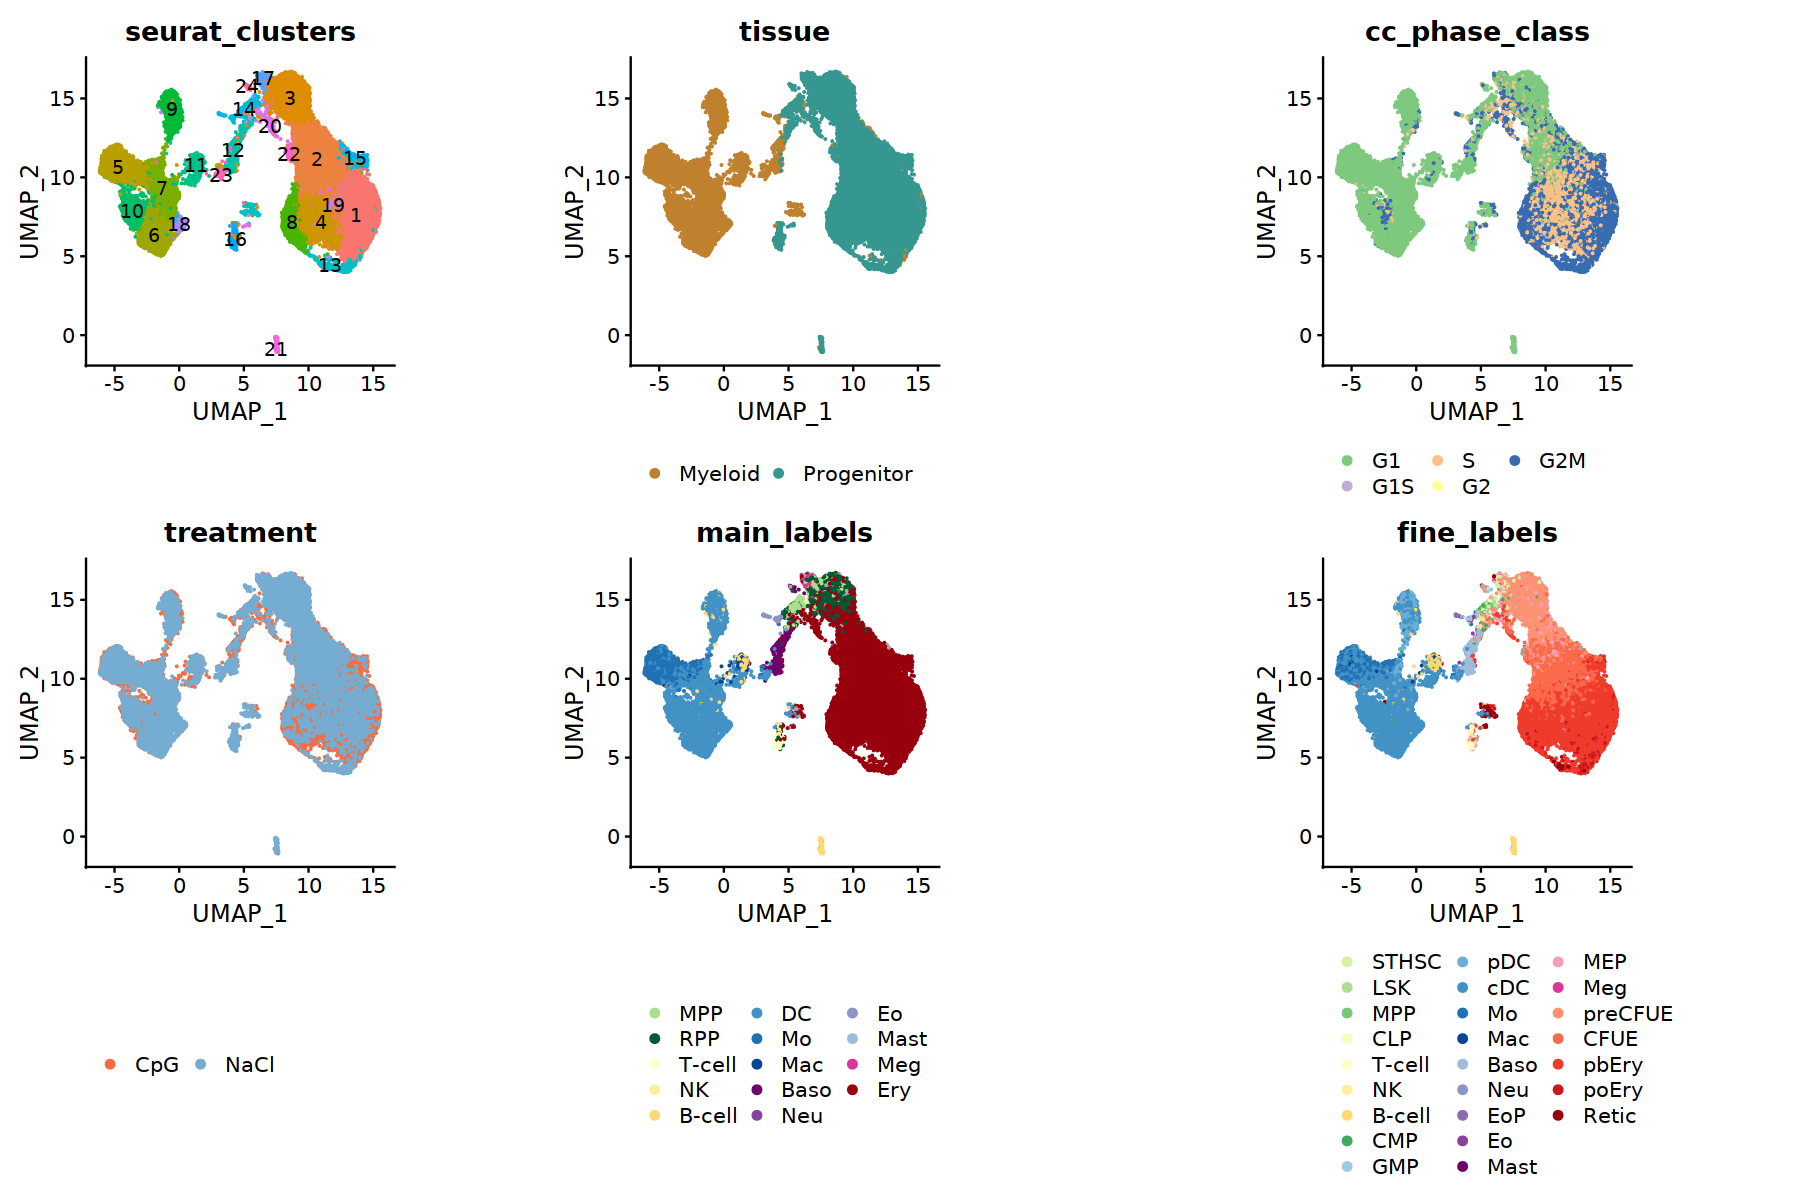

In [10]:
options(repr.plot.width=15, repr.plot.height=10)
dplot_1(so, cluster="seurat_clusters")

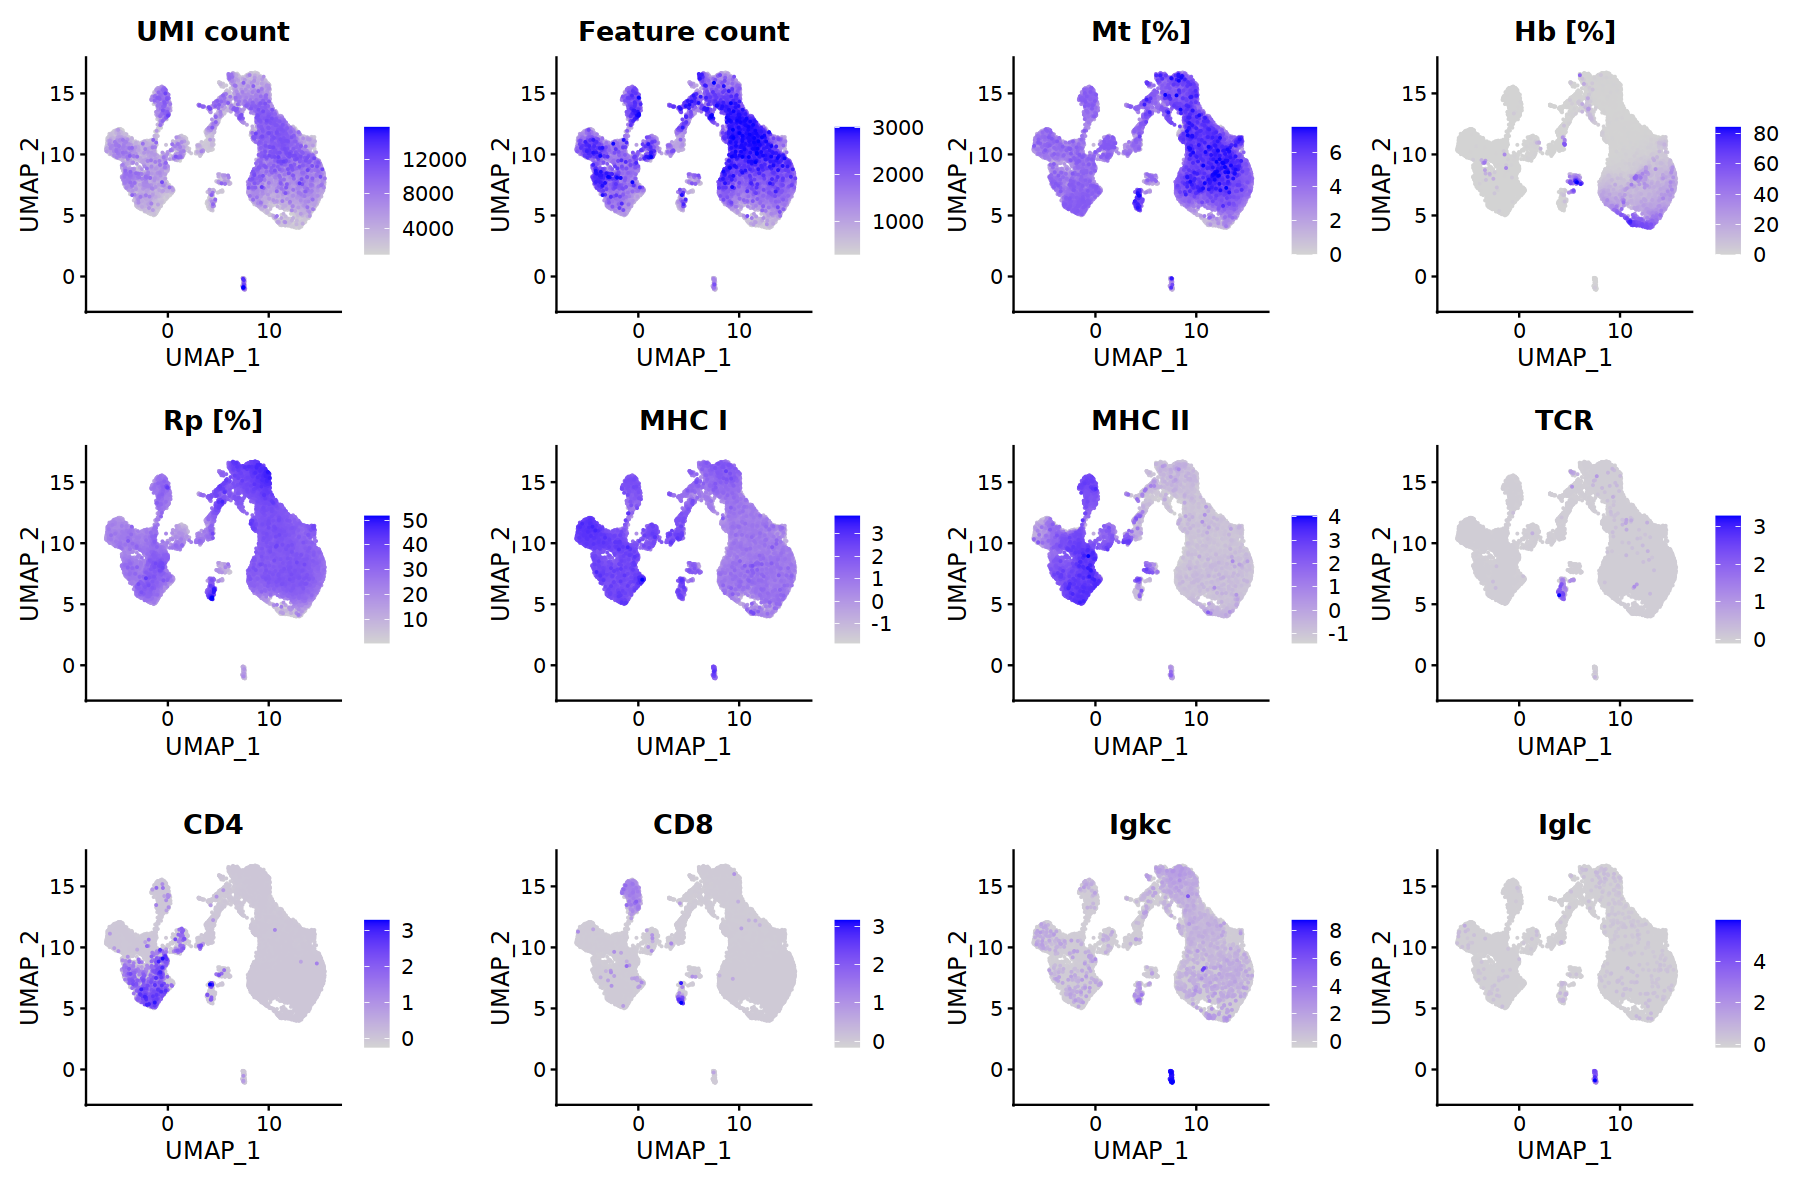

In [11]:
options(repr.plot.width=15, repr.plot.height=10)
fplot_1(so)

# Dimensional reduction and clustering (Corrected counts) 

In [ ]:
# Find clusters, then run UMAP, and visualize
DefaultAssay(so) <- "SCVI"
VariableFeatures(so) <- rownames(so)
so <- ScaleData(so, assay="SCVI")
so <- RunPCA(so, npcs=10, assay="SCVI", verbose=FALSE)
so <- FindNeighbors(so, dims=1:10, reduction="pca", assay="SCVI", graph.name=c("SCVI_nn", "SCVI_snn"), return.neighbor=FALSE, verbose=FALSE)
so <- FindClusters(so, algorithm=4, graph.name="SCVI_snn", random.seed=random_seed, verbose=FALSE)
so <- RunUMAP(so, dims=1:10, reduction="pca", umap.method="umap-learn", seed.use=random_seed, verbose=FALSE)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
dplot_1(so, cluster="seurat_clusters")

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
fplot_1(so)